## Imports

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

## Demand probability dictionary creation


In [ ]:
demand_values = [d for d in range(40,166,5)]
part1 = [n/1000 for n in range(9,70,5)]
part2 = [n/1000 for n in range(68,12,-5)]
part3 = [0.007]
prob = part1 + part2 + part3

demand_prob = dict(zip(demand_values,prob))

## Retailer profit definition and optimal q calculation for centralized case

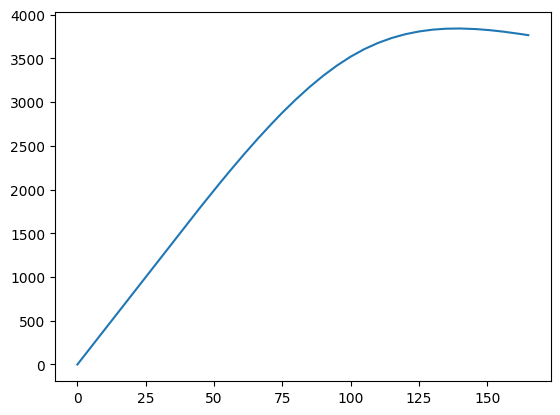

In [ ]:
def profit_calculator(c=10,r=50,s=5,Q=0):
  profit = 0
  for d in demand_prob.keys():
    profit += (r * min(d,Q) + s * max(0,Q-d) - c * Q ) * demand_prob[d]
  return profit

q_list = [q for q in range(0,166)]
profit_list = [profit_calculator(c=10,r=50,s=5,Q=q) for q in q_list]
plt.plot(q_list,profit_list)
plt.show()

In [ ]:
def optimal_values(c=10, r=50, s=5):
  q_list = [q for q in range(0,166)]
  profit_list = [profit_calculator(c=c,r=r,s=s,Q=q) for q in q_list]
  optimal_profit = max(profit_list)
  index = profit_list.index(optimal_profit)
  optimal_q = q_list[index]
  return optimal_q, optimal_profit

optimal_q, optimal_profit = optimal_values(c=10, r=50, s=5)
print(f"The optimal q is {optimal_q}")
print(f"The optimal profit is {optimal_profit:.2f}")

The optimal q is 140
The optimal profit is 3842.30


## Supplier's profit and supply chain analysis in decentralised case


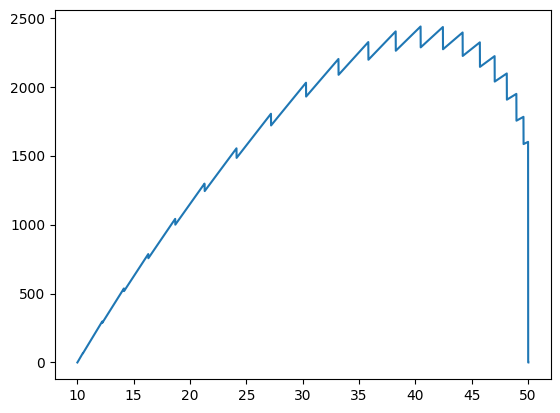

In [ ]:
def profit_supplier(c=10, r=50, s=5, w=15):
  profit = (w-c)* optimal_values(c=w, r=50, s=5)[0]
  return profit

w_list = [w for w in np.arange(10,50.02,0.01).tolist()]
profit_supplier_list = [profit_supplier(c=10, r=50, s=5, w=w) for w in w_list]
plt.plot(w_list, profit_supplier_list)
plt.show()

In [ ]:
def optimal_SC_values_for_supplier(c=10, r=50, s=5):
  w_list = [w for w in np.arange(10,51,0.01).tolist()]
  profit_supplier_list = [profit_supplier(c=10, r=50, s=5, w=w) for w in w_list]
  optimal_supplier_profit = max(profit_supplier_list)
  index = profit_supplier_list.index(optimal_supplier_profit)
  optimal_w = w_list[index]
  optimal_Q = optimal_values(c=optimal_w, r=50, s=5)[0]
  retailer_profit = optimal_values(c=optimal_w, r=50, s=5)[1]
  optimal_supply_chain_profit = optimal_supplier_profit + retailer_profit
  return optimal_w, optimal_Q, optimal_supplier_profit, retailer_profit, optimal_supply_chain_profit

In [ ]:
optimal_w, optimal_Q, optimal_supplier_profit, retailer_profit, optimal_supply_chain_profit = optimal_SC_values_for_supplier(c=10, r=50, s=5)
print(f"The optimal supplier profit is {optimal_supplier_profit:.2f}")
print(f"The optimal retailer profit is {retailer_profit:.2f}")
print(f"The optimal supply chain profit is {optimal_supply_chain_profit:.2f} with w equal to {optimal_w:.2f} and q equal to {optimal_Q:.2f}")

The optimal supplier profit is 2436.80
The optimal retailer profit is 595.80
The optimal supply chain profit is 3032.60 with w equal to 40.46 and q equal to 80.00


## Coordination contract: win-win situation for supplier and retailer

In [ ]:
def profit_supplier_coordination(c=10, r=50, s=5, w=15, b=1):
  profit = 0
  Q = optimal_values(c=w, r=50, s=s+b)[0]
  for d in demand_prob.keys():
    profit += ((w-c) * Q  - b * max(0, Q-d) ) * demand_prob[d]
  return profit

def profit_retailer_coordination(c=10, r=50, s=5, w=15, b=1):
  return optimal_values(c=w, r=r, s=s+b)[1]

def profit_supply_chain_coordination(c=10, r=50, s=5):
  w_list = [w for w in np.arange(10, 50.01, 0.1).tolist()]
  b_list = [b for b in np.arange(10, 50.01, 0.1).tolist()]
  threshold = float('inf')
  obj_b = None
  obj_w = None
  obj_supplier_profit = None
  obj_retailer_profit = None
  obj_supply_chain_profit = None

  for w in w_list:
    for b in b_list:
      supplier_profit = profit_supplier_coordination(c=c, r=r, s=s, w=w, b=b)
      retailer_profit = profit_retailer_coordination(c=w, r=r, s=s, w=w, b=b)
      difference = abs(supplier_profit - retailer_profit)
      if difference != 0 and difference < threshold and b + w < r:
        threshold = difference
        obj_b = b
        obj_w = w
        obj_supplier_profit = supplier_profit
        obj_retailer_profit = retailer_profit
        supply_chain_profit = supplier_profit + retailer_profit

  return obj_supplier_profit, obj_retailer_profit, supply_chain_profit, obj_b, obj_w

In [ ]:
obj_supplier_profit, obj_retailer_profit, supply_chain_profit, obj_b, obj_w = profit_supply_chain_coordination(c=10, r=50, s=5)

print(f"The supplier profit is {obj_supplier_profit:.2f}")
print(f"The retailer profit is {obj_retailer_profit:.2f}")
print(f"The supply chain profit is {supply_chain_profit:.2f}, with b equal to {obj_b:.2f} and w equal to {obj_w:.2f}")

The supplier profit is 1888.24
The retailer profit is 1888.46
The supply chain profit is 3776.70, with b equal to 16.70 and w equal to 28.90
